# Linear Regression 

## import library

In [25]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

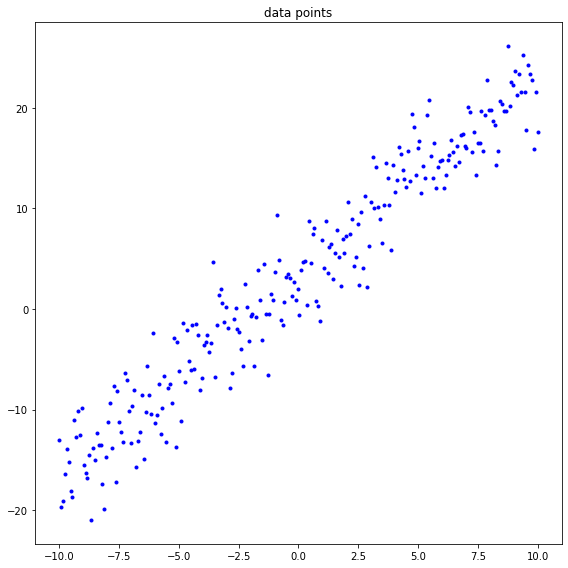

-9.764706


In [66]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the loss function

In [53]:
def compute_loss(x, y, theta0, theta1):

    front = (1 / (x.shape[0]))
    sum = 0
    for i in range(x.shape[0]):
        sum += pow(theta0 + theta1 * x[i] - y[i], 2)
        
    loss = front * sum
    
    return loss

## compute the gradient for each model parameter

In [69]:
def compute_gradient_theta0(x, y, theta0, theta1):
    
    front = (2 / x.shape[0])
    sum = 0
    for i in range(x.shape[0]):
        sum += (theta0 + theta1 * x[i] - y[i])
        
    dL = front * sum
    
    return dL

In [55]:
def compute_gradient_theta1(x, y, theta0, theta1):

    front = (2 / x.shape[0])
    sum = 0
    for i in range(x.shape[0]):
        sum += ((theta0 + (theta1 * x[i]) - y[i]) * x[i])

    dL = front * sum

    return dL

## gradient descent for each model parameter

In [75]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

m = 100
theta0min = 0
theta1min = 0

theta0_iteration[0] = theta0
theta1_iteration[0] = theta1
loss_iteration[0]    = compute_loss(x, y, theta0, theta1)
for i in range(1, num_iteration):

    theta0  = theta0 - learning_rate * compute_gradient_theta0(x, y, theta0, theta1)
    theta1  = theta1 - learning_rate * compute_gradient_theta1(x, y, theta0, theta1)
    loss    = compute_loss(x, y, theta0, theta1)
    
    if loss < m:
        m = loss
        theta0min = theta0
        theta1min = theta1
    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss
    
    #print("iteration = %4d, loss = %5.5f" % (i, loss))

In [76]:
f = np.zeros(x.shape[0])
for i in range(x.shape[0]):
    f[i] = theta0min + theta1min * x[i]

## plot the results

In [77]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '.', color = 'blue')
    plt.plot(x, f, '-', color = 'red')
    plt.title('linear regression result')

    
    plt.tight_layout()
    plt.show()

In [78]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.plot(loss_iteration, '-', color = 'red')
    plt.title('loss curve')

    
    plt.tight_layout()
    plt.show()

In [79]:

def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.plot(theta0_iteration, '-', color = 'blue')
    plt.plot(theta1_iteration, '-', color = 'green')
    plt.title('model parameter')


    plt.tight_layout()
    plt.show()

In [80]:

X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

grid_theta0, grid_theta1 = np.meshgrid(X0,X1)
sum = np.arange(-10, 10, 0.1)
R = (1 / x.shape[0])
for i in range(len(X0)):
    for j in range(x.shape[0]):
        sum[i] += pow(X0[i] + X1[i] * x[j] - y[j], 2)
    sum[i] = R * sum[i]

grid_loss = sum
grid_loss = np.asmatrix(grid_loss)
grid_loss = grid_loss.T

def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):
    fig = plt.figure(figsize=(8,6))
    ax3d = plt.axes(projection="3d")

    ax3d = plt.axes(projection='3d')
    ax3d.plot_surface(grid_theta0, grid_theta1, grid_loss ,cmap='coolwarm')
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

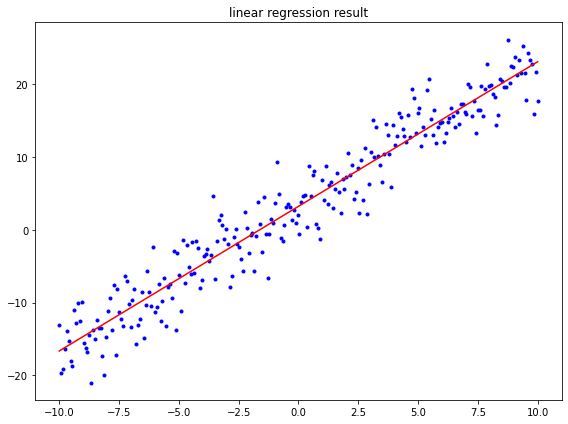

In [81]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue and $\theta_1$ in green over the gradient descent iterations

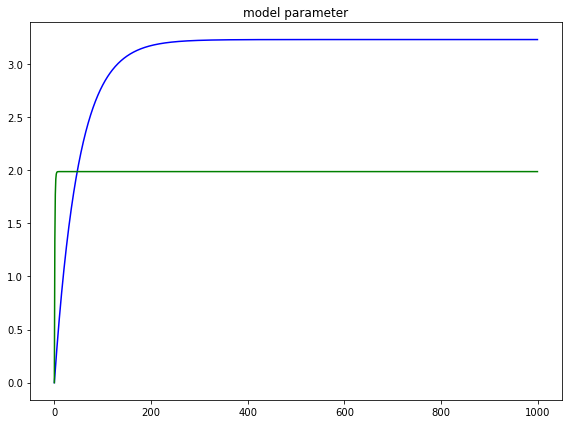

In [82]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red over the gradient descent iterations

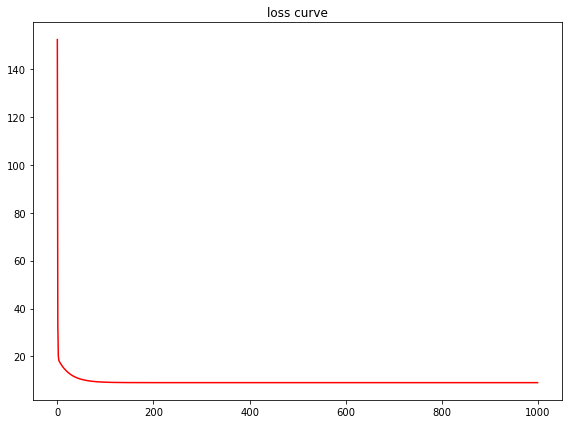

In [83]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

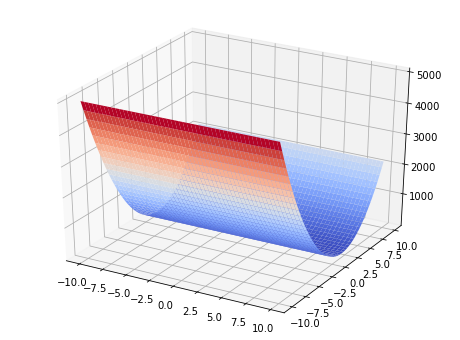

In [74]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)